Field-> Description
CustomerId -> A unique identifier for each customer
Surname ->The customer's last name
CreditScore ->	A numerical value representing the customer's credit score
Geography -> The country where the customer resides (France, Spain or Germany)
Gender -> The customer's gender (Male or Female)
Age	-> The customer's age
Tenure	-> The number of years the customer has been with the bank
Balance	-> The customer's account balance
NumOfProducts -> The number of bank products the customer uses (e.g., savings account, credit card)
HasCrCard -> Whether the customer has a credit card (1 = yes, 0 = no)
IsActiveMember	-> Whether the customer is an active member (1 = yes, 0 = no)
EstimatedSalary	-> The estimated salary of the customer
Exited	-> Whether the customer has churned (1 = yes, 0 = no)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Bank_churn=pd.read_csv('/kaggle/input/bank-data/Bank_Churn.csv')
Bank_churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
Bank_churn.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:

Bank_churn.drop(['CustomerId', 'Surname'],axis=1,inplace=True)

In [5]:
Bank_churn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
Bank_churn.dropna()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
Bank_churn.drop_duplicates()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
Bank_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
Bank_churn['Balance_to_Salary_ratio']=Bank_churn.Balance/(Bank_churn.EstimatedSalary+1)
Bank_churn['Is_Zero_Balance'] = (Bank_churn['Balance'] == 0).astype(int)
Bank_churn['Products_per_year']=Bank_churn.NumOfProducts/(Bank_churn.Tenure+1)
balance_threshold=Bank_churn.Balance.quantile(0.75)


In [10]:
Bank_churn['High_value_customer'] = (Bank_churn.Balance > balance_threshold).map({True: 1, False: 0})

In [11]:
# Age Bucket
# Churn behavior differs by life stage
Bank_churn['Age_Bucket']=pd.cut(Bank_churn.Age,bins=[0,30,45,60,100],labels=['Young','Mid','Senior','Very_Senior'])

In [12]:
#Tenure Bucket
# Early churn vs loyal customer
Bank_churn['Tenure_Bucket']=pd.cut(Bank_churn.Tenure,bins=[-1,2,5,10],labels=['New','medium','Loyal'])

In [13]:
Bank_churn['Inactive_High_Balance'] = (
    (Bank_churn['IsActiveMember'] == 0) &
    (Bank_churn['Balance'] > balance_threshold)
).astype(int)


In [14]:
Bank_churn.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Balance_to_Salary_ratio', 'Is_Zero_Balance',
       'Products_per_year', 'High_value_customer', 'Age_Bucket',
       'Tenure_Bucket', 'Inactive_High_Balance'],
      dtype='object')

In [15]:
Bank_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   CreditScore              10000 non-null  int64   
 1   Geography                10000 non-null  object  
 2   Gender                   10000 non-null  object  
 3   Age                      10000 non-null  int64   
 4   Tenure                   10000 non-null  int64   
 5   Balance                  10000 non-null  float64 
 6   NumOfProducts            10000 non-null  int64   
 7   HasCrCard                10000 non-null  int64   
 8   IsActiveMember           10000 non-null  int64   
 9   EstimatedSalary          10000 non-null  float64 
 10  Exited                   10000 non-null  int64   
 11  Balance_to_Salary_ratio  10000 non-null  float64 
 12  Is_Zero_Balance          10000 non-null  int64   
 13  Products_per_year        10000 non-null  float64 
 14  High_va

In [16]:
Bank_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_to_Salary_ratio,Is_Zero_Balance,Products_per_year,High_value_customer,Age_Bucket,Tenure_Bucket,Inactive_High_Balance
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,1,0.333333,0,Mid,New,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744670,0,0.500000,0,Mid,New,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401362,0,0.333333,1,Mid,Loyal,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,1,1.000000,0,Mid,New,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587035,0,0.333333,0,Mid,New,0


In [17]:
Bank_churn.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Balance_to_Salary_ratio', 'Is_Zero_Balance',
       'Products_per_year', 'High_value_customer', 'Age_Bucket',
       'Tenure_Bucket', 'Inactive_High_Balance'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

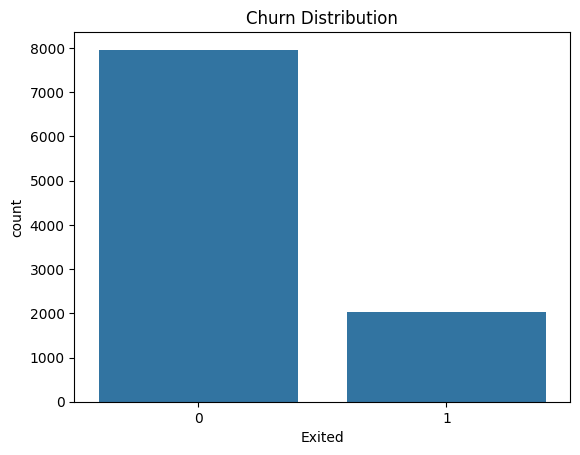

In [18]:
sns.countplot(x='Exited',data=Bank_churn)
plt.title('Churn Distribution')
plt.show

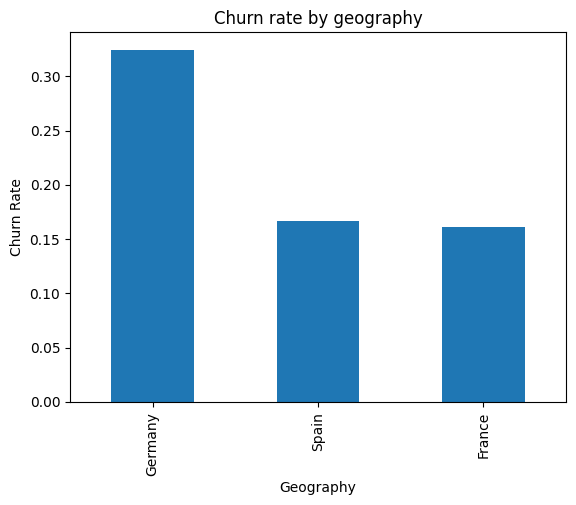

In [19]:
geo_churn = Bank_churn.groupby('Geography')['Exited'].mean().sort_values(ascending=False)
geo_churn.plot(kind='bar', title='Churn rate by geography')
plt.ylabel('Churn Rate')
plt.show()

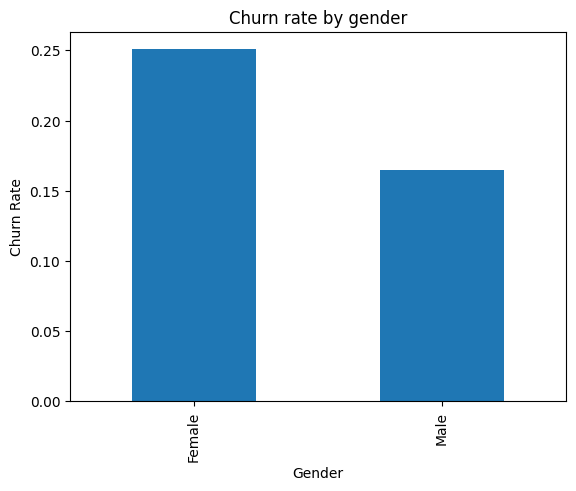

In [20]:
gender_churn=Bank_churn.groupby('Gender')['Exited'].mean().sort_values(ascending=False)
gender_churn.plot(kind='bar',title='Churn rate by gender')
plt.ylabel('Churn Rate')
plt.show()

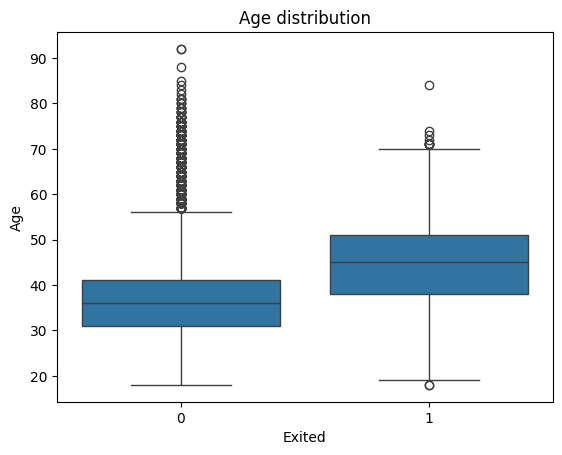

In [21]:
sns.boxplot(x='Exited',y='Age',data=Bank_churn)
plt.title('Age distribution')
plt.show()

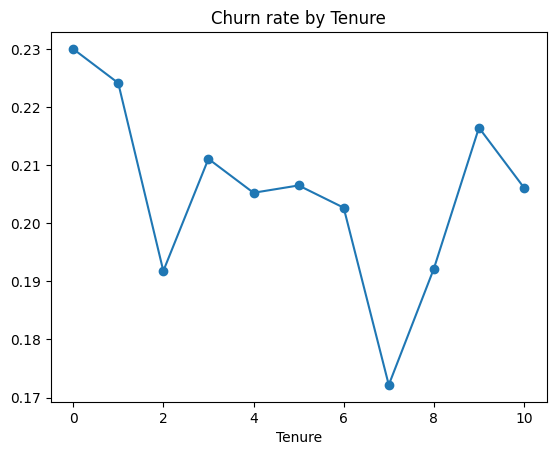

In [22]:
tenure_churn=Bank_churn.groupby('Tenure')['Exited'].mean()
tenure_churn.plot(kind='line',marker='o',title='Churn rate by Tenure')
plt.show()

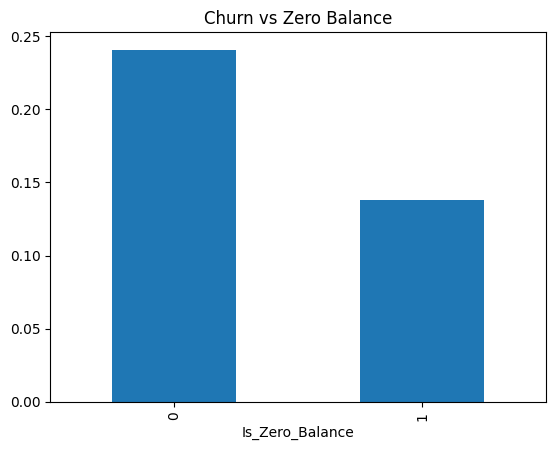

In [23]:
zero_churn=Bank_churn.groupby('Is_Zero_Balance')['Exited'].mean()
zero_churn.plot(kind='bar',title='Churn vs Zero Balance')
plt.show()

<Axes: title={'center': 'Churn vs Active Status'}, xlabel='IsActiveMember'>

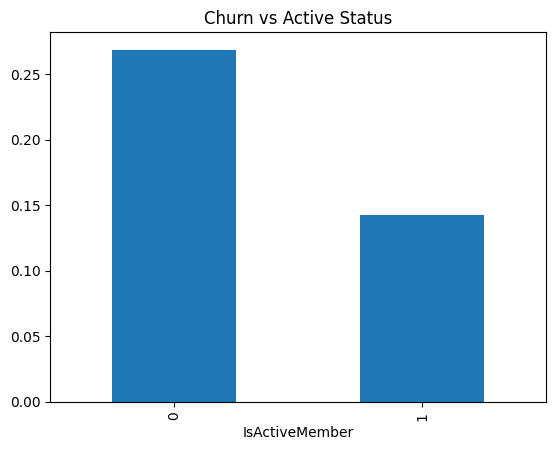

In [24]:
active_churn=Bank_churn.groupby('IsActiveMember')['Exited'].mean()
active_churn.plot(kind='bar',title='Churn vs Active Status')

<Axes: title={'center': 'Churn vs Number of Products'}, xlabel='NumOfProducts'>

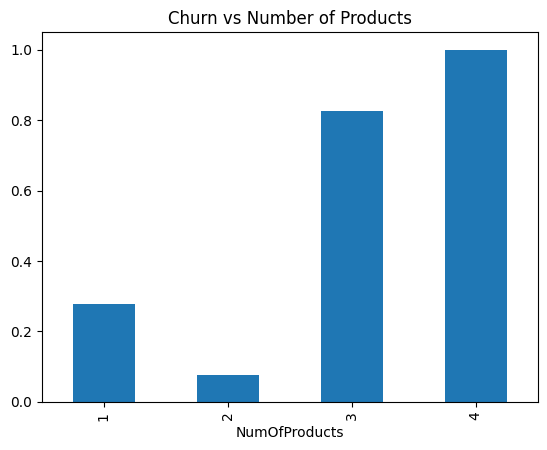

In [25]:
product_churn=Bank_churn.groupby('NumOfProducts')['Exited'].mean()
product_churn.plot(kind='bar',title='Churn vs Number of Products')


Text(0.5, 1.0, 'Credit Score vs Churn')

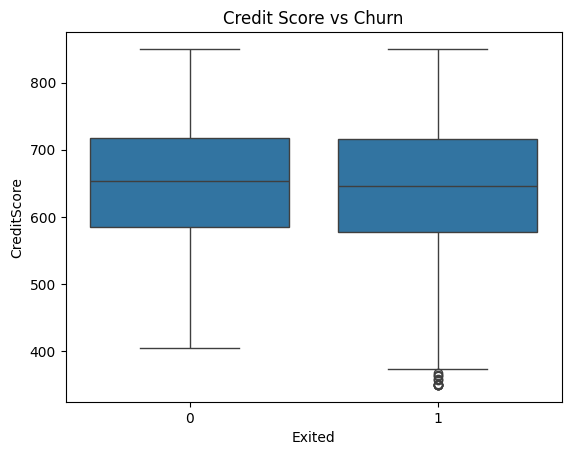

In [26]:
sns.boxplot(data=Bank_churn,x='Exited',y='CreditScore')
plt.title('Credit Score vs Churn')

In [27]:
Bank_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   CreditScore              10000 non-null  int64   
 1   Geography                10000 non-null  object  
 2   Gender                   10000 non-null  object  
 3   Age                      10000 non-null  int64   
 4   Tenure                   10000 non-null  int64   
 5   Balance                  10000 non-null  float64 
 6   NumOfProducts            10000 non-null  int64   
 7   HasCrCard                10000 non-null  int64   
 8   IsActiveMember           10000 non-null  int64   
 9   EstimatedSalary          10000 non-null  float64 
 10  Exited                   10000 non-null  int64   
 11  Balance_to_Salary_ratio  10000 non-null  float64 
 12  Is_Zero_Balance          10000 non-null  int64   
 13  Products_per_year        10000 non-null  float64 
 14  High_va

In [28]:
num_cols = [
    'CreditScore',
    'Age',
    'Tenure',
    'Balance',
    'NumOfProducts',
    'EstimatedSalary',
    'Balance_to_Salary_ratio',
    'Products_per_year'
]

In [29]:
def iqr_outlier_summary(Bank_churn, cols):
    summary = {}
    for col in cols:
        Q1 = Bank_churn[col].quantile(0.25)
        Q3 = Bank_churn[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outlier_pct = ((Bank_churn[col] < lower) | (Bank_churn[col] > upper)).mean() * 100

        summary[col] = {
            'Lower_Limit': lower,
            'Upper_Limit': upper,
            'Outlier_%': round(outlier_pct, 2)
        }
    return pd.DataFrame(summary).T


In [30]:
outlier_report = iqr_outlier_summary(Bank_churn, num_cols)
outlier_report


,Lower_Limit,Upper_Limit,Outlier_%
CreditScore,383.000000,919.000000,0.15
Age,14.000000,62.000000,3.59
Tenure,-3.000000,13.000000,0.00
Balance,-191466.360000,319110.600000,0.00
NumOfProducts,-0.500000,3.500000,0.60
EstimatedSalary,-96577.096250,296967.453750,0.00
Balance_to_Salary_ratio,-2.271003,3.785005,9.72
Products_per_year,-0.333333,1.000000,2.24


In [31]:
Bank_churn['Age'] = Bank_churn['Age'].clip(lower=18, upper=62)
Bank_churn['Tenure'] = Bank_churn['Tenure'].clip(lower=0, upper=10)
Bank_churn['NumOfProducts'] = Bank_churn['NumOfProducts'].clip(lower=1, upper=4)
Q1 = Bank_churn['Balance_to_Salary_ratio'].quantile(0.25)
Q3 = Bank_churn['Balance_to_Salary_ratio'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
Bank_churn['Balance_to_Salary_ratio'] = Bank_churn['Balance_to_Salary_ratio'].clip(lower, upper)
Q1 = Bank_churn['Products_per_year'].quantile(0.25)
Q3 = Bank_churn['Products_per_year'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
Bank_churn['Products_per_year'] = Bank_churn['Products_per_year'].clip(lower, upper)


In [32]:
Bank_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_to_Salary_ratio,Is_Zero_Balance,Products_per_year,High_value_customer,Age_Bucket,Tenure_Bucket,Inactive_High_Balance
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,1,0.333333,0,Mid,New,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744670,0,0.500000,0,Mid,New,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401362,0,0.333333,1,Mid,Loyal,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,1,1.000000,0,Mid,New,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587035,0,0.333333,0,Mid,New,0


In [33]:
X = Bank_churn.drop(columns=['Exited'])
y = Bank_churn['Exited']

In [34]:
numeric_features = [
    'CreditScore',
    'Age',
    'Tenure',
    'Balance',
    'EstimatedSalary',
    'Balance_to_Salary_ratio',
    'Products_per_year'
]
binary_features = [
    'HasCrCard',
    'IsActiveMember',
    'Is_Zero_Balance',
    'High_value_customer',
    'Inactive_High_Balance'
]
categorical_features = [
    'Geography',
    'Gender',
    'Age_Bucket',
    'Tenure_Bucket'
]

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('bin', 'passthrough', binary_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [37]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])


In [38]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'EstimatedSalary',
                                                   'Balance_to_Salary_ratio',
                                                   'Products_per_year']),
                                                 ('bin', 'passthrough',
                                                  ['HasCrCard',
                                                   'IsActiveMember',
                                                   'Is_Zero_Balance',
                                                   'High_value_customer',
                                                   'Inactive_High_Balance']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handl...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [39]:
from sklearn.metrics import roc_auc_score, classification_report

y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))


ROC-AUC: 0.8497357141424938
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.43      0.55       407

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000

